Práctica 0

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
%matplotlib inline

Ej. 1

In [4]:
A = np.array([[1,0,1],
			  [2,-1,1],
			  [-3,2,-2]], dtype=int)

y = np.array([-2,1,-1], dtype=int)

x = np.linalg.solve(A, y)
xx = np.dot(np.linalg.inv(A), y)

print("x={}\nx'={}".format(x,xx))

x=[ 1. -2. -3.]
x'=[ 1. -2. -3.]


Ej. 2

mean = 3*2 = 5.973887198252712
sigma = sqrt(3)*2 = 3.4555803119083945


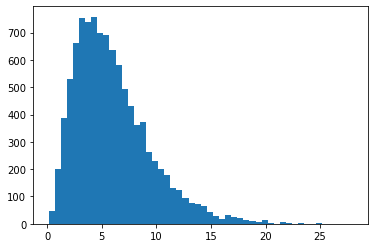

In [7]:
data = np.random.gamma(3, 2, 10000)
mean = np.mean(data)
std = np.std(data)

print("mean = 3*2 = {}\nsigma = sqrt(3)*2 = {}".format(mean, std))
plt.hist(data, bins=50);

Ej. 3

In [8]:
def roots(a, b=0, c=0):
    x = np.zeros((2), dtype=complex)
    det = (b**2 - 4*a*c)**0.5
    x[0] = (1/2*a) * (-b + det)
    x[1] = (1/2*a) * (-b - det)

    return x

print(roots(2, 0, 1))

[ 1.73191211e-16+2.82842712j -1.73191211e-16-2.82842712j]


Ej. 4

C:\Users\Lautaro\AppData\Local\Temp\ipykernel_6280\4249084738.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  raices = roots(*coefs).astype(int)


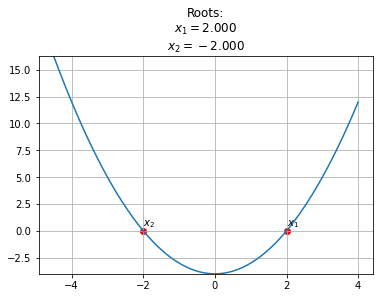

In [46]:
x = np.linspace(-4.5, 4, 100)
coefs = (1, 0,  -4)

func = np.ones([x.shape[0], 3])
func[:,0] = x**2
func[:,1] = x

y = np.dot(func, coefs)

raices = roots(*coefs).astype(int)

plt.scatter(raices, [0,0], c='red')
plt.plot(x, y)
plt.ylim(np.min(y), np.max(y))
plt.title('Roots:\n$x_1 = {:.3f}$\n$x_2 = {:.3f}$'.format(*raices))  # Que lindo LaTex
plt.annotate(text='$x_1$', xy=(raices[0], 0), xytext=(raices[0], .5), )
plt.annotate(text='$x_2$', xy=(raices[1], 0), xytext=(raices[1], .5))


plt.grid()



Ej. 5

In [19]:
class Lineal:
    def __init__(self, a, b):
        self.a = a 
        self.b = b

    def __call__(self, x):
        return self.a + self.b * x

In [20]:
recta = Lineal(1,1)

recta(1)

2

Ej. 6

In [22]:
class Exponencial(Lineal):
    def __init__(self, a, b):
        super().__init__(a, b)

    def __call__(self, x):
        return self.a * np.power(x, self.b)

In [23]:
exp = Exponencial(1, 2)

exp(2)

4

Ej. 7

In [26]:
%%writefile circunferencia.py
import numpy as np
PI = np.pi

def area(r):
    return PI*r**2

Overwriting circunferencia.py


In [29]:
import circunferencia as circle
from circunferencia import PI
from circunferencia import area

print(PI, area(3), circle.area(3))
print(PI is circle.PI)
print(area is circle.area)

3.141592653589793 28.274333882308138 28.274333882308138
True
True


Ej. 8

In [30]:
%mkdir geometria

In [32]:
%%writefile geometria/__init__.py
"""empty init"""

Writing geometria/__init__.py


In [36]:
import shutil

In [37]:
source_file = os.path.join(os.curdir, 'circunferencia.py')
destiny_folder = os.path.join(os.curdir, 'geometria')

shutil.copy(source_file, destiny_folder)

'.\\geometria\\circunferencia.py'

In [38]:
%%writefile geometria/rectangulo.py

def area(a, b):
    return a*b

Writing geometria/rectangulo.py


In [41]:
import geometria.rectangulo as rect

rect.area(2,3)

6

Ej. 9

In [43]:
%mkdir p0_lib

Ya existe el subdirectorio o el archivo p0_lib.


In [44]:
%%writefile p0_lib/__init__.py
"""init de la libreria p0"""

Writing p0_lib/__init__.py


In [45]:
import shutil 
destiny_folder = os.path.join(os.curdir, 'p0_lib')
shutil.copy(os.path.join(os.curdir, 'circunferencia.py'), destiny_folder)
shutil.copy(os.path.join(os.curdir, 'geometria', 'rectangulo.py'), destiny_folder)

'.\\p0_lib\\rectangulo.py'

In [46]:
%%writefile p0_lib/elipse.py
"""Modulo elipse"""

import numpy as np

def area(a, b):
    return np.pi*a*b

Writing p0_lib/elipse.py


In [49]:
import p0_lib
from p0_lib import rectangulo
from p0_lib.circunferencia import PI, area
from p0_lib.elipse import area
from p0_lib.rectangulo import area as area_rect

print(PI, area(1,1), area_rect(2,5))

3.141592653589793 3.141592653589793 10


Ej. 10

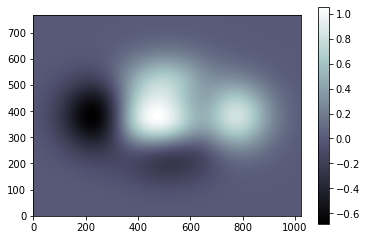

In [3]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
n = 256
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x,y)
plt.imshow(f(X, Y), cmap="bone", interpolation="none", origin="lower")
plt.colorbar();

Ej. 11

<a list of 9 text.Text objects>

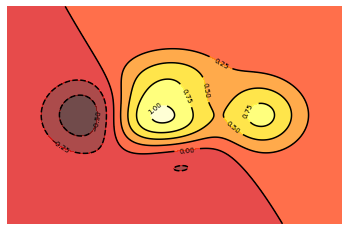

In [33]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f(X,Y), colors='black')
plt.axis('off')
ax.contourf(X, Y, f(X,Y), cmap='hot', alpha=.7)
ax.clabel(CS, fontsize=7)


Ej. 12

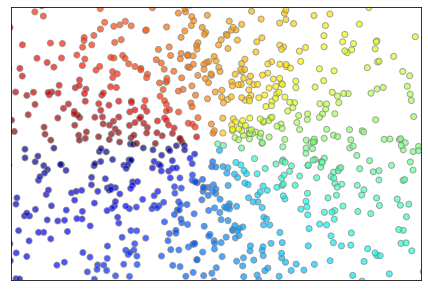

In [92]:
n = 1024
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
t = np.arctan2(y,x)

fig, ax = plt.subplots()

plt.axes([0.025, 0.025, .95, .95])
plt.scatter(x, y, c=t , cmap='jet', edgecolors='grey', alpha=.7)

plt.xlim(-1.5,1.5)
plt.xticks(())
plt.ylim(-1.5,1.5)
plt.yticks(());
plt.savefig('ej_12.pdf', format='pdf')
#plt.axis('off')

Ej. 13

In [170]:
class Pez:
    def __init__(self, vel, dist):
        self.pos = np.array(dist)
        self.vel = np.array(vel)

    def print(self):
        print(self.pos, self.vel)
    
p = Pez([1,1],[2,2])
type(p.pos)

numpy.ndarray

In [206]:
class Cardumen:
    N = 16
    step = .1
    def initialize(self, size, maxVel, maxDist):
        self.__maxVel = maxVel
        self.__maxDist = maxDist
        self.__size = size

        self.card = [Pez([maxVel*(2*np.random.random()-1), maxVel*(2*np.random.random()-1)], [size*np.random.random(),size*np.random.random()]) for i in range(self.N)]

    def __calcrc(self):
        mean = np.array([.0, .0])
        mean = np.sum(self.card[i].pos for i in range(self.N))
        return mean/self.N

    def __calcvc(self):
        mean = np.array([.0, .0])
        mean = np.sum(self.card[i].vel for i in range(self.N))
        return mean/self.N
    

    def __v1(self, i):
        return (self.__calcrc() - self.card[i].pos)/8

    def __v2(self, i):
        sum = [0., 0.]
        lis = [(self.card[i].pos - self.card[j].pos)/np.linalg.norm(self.card[i].pos - self.card[j].pos) for j in range(self.N) if np.linalg.norm(self.card[i].pos - self.card[j].pos) < self.__maxDist and j!=i]
        sum += np.sum(lis)
        return sum

    def __v3(self, i):
        return (self.__calcvc() - self.card[i].vel)/8

    def doStep(self):
        for i in range(self.N):
            dv = self.__v1(i) + self.__v2(i) + self.__v3(i)

            self.card[i].vel += dv
            if(np.linalg.norm(self.card[i].vel) > self.__maxVel):
                self.card[i].vel = (self.card[i].vel)/(np.linalg.norm(self.card[i].vel)) * self.__maxVel

            self.card[i].pos += dv*self.step

            if(np.linalg.norm(self.card[i].pos) > self.__size):
                self.card[i].pos += -2*dv*self.step
    
    def print(self):
        for i in range(3):
            print("$x_i$: ", self.card[i].pos, "$v_i$: ", self.card[i].vel)
        print("\n--------------------\n")
    

In [208]:
c = Cardumen()
niter = 20
c.initialize(40, 10, 20)
for i in range(niter):
    c.doStep()
    c.print()



C:\Users\Lautaro\AppData\Local\Temp\ipykernel_1372\1630732052.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  mean = np.sum(self.card[i].pos for i in range(self.N))
C:\Users\Lautaro\AppData\Local\Temp\ipykernel_1372\1630732052.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  mean = np.sum(self.card[i].vel for i in range(self.N))


$x_i$:  [29.06603589  6.66072886] $v_i$:  [-5.92358543 -5.52677574]
$x_i$:  [37.82986053  0.58602681] $v_i$:  [-7.4565545  0.4609142]
$x_i$:  [23.93621939 35.80346573] $v_i$:  [-2.03006115 -2.22129913]

--------------------

$x_i$:  [29.19978548  6.99544005] $v_i$:  [-4.58608956 -2.17966391]
$x_i$:  [37.49969075  0.55001899] $v_i$:  [-9.99956077  0.0937248 ]
$x_i$:  [23.86973205 35.95341644] $v_i$:  [-1.36518778 -3.72080615]

--------------------

$x_i$:  [29.33275953  7.30282433] $v_i$:  [-3.25634902  0.89417892]
$x_i$:  [37.188522    0.50299014] $v_i$:  [-9.99587817 -0.28708821]
$x_i$:  [23.80359559 36.08053976] $v_i$:  [-0.70382314 -4.99203936]

--------------------

$x_i$:  [29.22015023  7.33772457] $v_i$:  [-4.3824421   1.24318136]
$x_i$:  [36.87275596  0.44971799] $v_i$:  [-9.98063365 -0.62205463]
$x_i$:  [23.73651975 36.18810692] $v_i$:  [-0.0330647  -6.06771098]

--------------------

$x_i$:  [29.12868452  7.36862367] $v_i$:  [-5.29709912  1.55217235]
$x_i$:  [36.55563678  0.39

In [163]:
[1,2] + [2,3]

[1, 2, 2, 3]

Ej. 14

In [38]:
def party(npeople):
    births = np.random.randint(1, 366, npeople)
    return bool(len(births) - len(set(births)))

In [53]:
def stats():
    bins={}
    for i in range(17, 77, 10):
        aux = 0
        for j in range(10000):
            aux += party(i)
        bins[i] = aux/10000
    return bins


In [55]:
bins = stats()
print(bins)

{17: 0.3047, 27: 0.6426, 37: 0.8477, 47: 0.9575, 57: 0.9894, 67: 0.9988}


Ej. 15

In [6]:
class Noiser:
    def __init__(self, minV, maxV):
        self.__minV = minV
        self.__maxV = maxV

    def __call__(self, num):
        noise = np.random.uniform(self.__minV, self.__maxV)
        return num + noise

In [7]:
f = Noiser(0, 10)
print(f(100))

a = np.array([100, 50, -np.pi])

ff = np.vectorize(Noiser(0, 1))
ff(a)


109.6149648890991


array([100.13227944,  50.88794225,  -2.39649967])